[정리]
- 우리는 지금 12Hz 또는 15Hz로 깜빡이는 시각 자극(체커보드)에 대한 EEG 데이터를 분석 중이다.
- 이 실험은 SSVEP(지속적 시각 유발 전위)를 측정하기 위한 것이다.
- 목적: 자극 주파수(12Hz, 15Hz)와 그 고조파(harmonics)에 뇌가 얼마나 반응하는지를 정량화하는 것

[용어 및 개념 정리]
- Montage(전극 배치)
    - EEG 전극의 실제 공간상 위치 정보 의미
    - 이를 설정해야 두피 지도(topomap)를 그릴 수 있음
    - 여기서는 easycap-M1이라는 표준 전극 배치 사용
- Reference(기준 전극)
    - EEG 신호는 항상 기준 전극과의 전위 차이를 기록함
    - 여기서는 모든 채널의 평균(average reference)을 기준으로 사용
    - 노이즈를 줄이고 신호 품질을 높임
- Filter(필터링)
    - 저주차 노이즈 제거를 위해 0.1Hz 이상만 통과시키는 하이패스 필터 적용
    - 전력선 주파수(50hz)는 아직 필터링하지 않았지만 필요시 제거 가능

[주파수 분석 관련 개념]
- PSD(Power Spectral Density, 전력 스펙트럼 밀도)
    - 신호의 주파수별 에너지 분포를 보여줌
    - 어떤 주파수에 뇌가 많이 반응했는지를 파악할 수 있음
    - 주로 FFR(고속 푸리에 변환)을 이용해서 계산
- Welch 방법
    - 일반적으로는 신호를 여러 구간(segment)으로 나눠 평균을 내는 방식
    - 여기서는 segment를 1개만 써서 사실행 FFT 한 번만 수행하는 구조
- Boxcar window
    - 데이터를 자르기 위해 사용되는 창(window) 함수
    - boxcar는 그냥 그대로 사용하는 것과 같음 -> 가중치없이 모든 샘플을 동일하게 취급
- SNR(Signal-to-Noise Ratio)
    - 특정 주파수에서의 신호의 강도를, 그 이웃 주파수의 평균 강도로 나눈 값
    - 단순 PSD보다 더 정규화되어 있고, 신호 대 잡음비를 파악하는 데 유리



# Frequency-tagging: Basic analysis of an SSVEP/vSSR dataset

In this tutorial we compute the frequency spectrum and quantify signal-to-noise
ratio (SNR) at a target frequency in EEG data recorded during fast periodic
visual stimulation (FPVS) at 12 Hz and 15 Hz in different trials.
Extracting SNR at stimulation frequency is a simple way to quantify frequency
tagged responses in MEEG (a.k.a. steady state visually evoked potentials,
SSVEP, or visual steady-state responses, vSSR in the visual domain,
or auditory steady-state responses, ASSR in the auditory domain).

For a general introduction to the method see
[Norcia et al. (2015)](https://doi.org/10.1167/15.6.4) for the visual domain,
and [Picton et al. (2003)](https://doi.org/10.3109/14992020309101316) for
the auditory domain.

**Data and outline:**

We use a simple example dataset with frequency tagged visual stimulation:
N=2 participants observed checkerboard patterns inverting with a constant
frequency of either 12.0 Hz of 15.0 Hz.
32 channels wet EEG was recorded.
(see `ssvep-dataset` for more information).

We will visualize both the power-spectral density (PSD) and the SNR
spectrum of the epoched data,
extract SNR at stimulation frequency,
plot the topography of the response,
and statistically separate 12 Hz and 15 Hz responses in the different trials.
Since the evoked response is mainly generated in early visual areas of the
brain the statistical analysis will be carried out on an occipital
ROI.


## 주파수 태깅(Frequency-tagging): SSVEP/vSSR 데이터셋의 기본 분석
- 이 튜토리얼에서는 빠른 주기 시각 자극(FPVS, Fast Periodic Visual Stimulation) 동안 12 Hz 및 15 Hz에서 기록된 EEG 데이터의 주파수 스펙트럼을 계산하고,
- 목표 주파수에서의 신호 대 잡음비(SNR, Signal-to-Noise Ratio)를 정량화한다.

- 자극 주파수에서의 SNR을 추출하는 것은 MEEG에서 주파수 태깅 반응(frequency-tagged responses)을 정량화하는 간단한 방법이다.
- 이는 시각 영역에서는 지속적 시각 유발 전위(SSVEP, Steady-State Visually Evoked Potentials 또는 vSSR)로, 청각 영역에서는 지속적 청각 유발 반응(ASSR, Auditory Steady-State Responses)로도 불린다.

- 이 방법에 대한 일반적인 소개는 다음 논문들을 참고하라:
- 시각 영역: Norcia et al. (2015)
- 청각 영역: Picton et al. (2003)

[데이터와 개요]
- 우리는 주파수 태깅된 시각 자극을 이용한 간단한 예제 데이터셋을 사용한다.
- 2명의 참가자가 12.0 Hz 또는 15.0 Hz의 일정한 주기로 반전되는 체커보드 패턴을 관찰하였다.
- 총 32채널의 습식 EEG가 기록되었다. (자세한 내용은 ssvep-dataset 참고)

[이 튜토리얼에서는 다음을 수행한다.]
- Epoch된 데이터의 파워 스펙트럼 밀도(PSD) 및 SNR 스펙트럼 시각화
- 자극 주파수에서의 SNR 추출
- 반응의 두피 분포(Topography) 시각화
 각 트라이얼에서의 12 Hz와 15 Hz 반응을 통계적으로 분리

유발 반응은 주로 후두엽 시각 영역에서 생성되기 때문에, 통계 분석은 후두부 ROI(Region of Interest)에 대해 수행된다.

In [ ]:
# Authors: Dominik Welke <dominik.welke@web.de>
#          Evgenii Kalenkovich <e.kalenkovich@gmail.com>
#
# License: BSD-3-Clause
# Copyright the MNE-Python contributors.

In [2]:
import matplotlib.pyplot as plt # 그래프 시각화 라이브러리
import numpy as np  # 수치 계산을 위한 파이썬 기본 라이브러리
from scipy.stats import ttest_rel   # 대응표본 t-test(paired t-test)를 위한 함수

import mne  # EEG, MEG 데이터를 다룰 때 사용하는 핵심 라이브러리

## Data preprocessing (데이터 전처리)
Due to a generally high SNR in SSVEP/vSSR, typical preprocessing steps
are considered optional. This doesn't mean, that a proper cleaning would not
increase your signal quality!

* Raw data have FCz reference, so we will apply common-average rereferencing.

* We  will apply a 0.1 highpass filter.

* Lastly, we will cut the data in 20 s epochs corresponding to the trials.

[데이터 전처리]
1. SSVEP/vSSR 데이터는 일반적으로 SNR이 높기 때문에, 전형적인 전처리 단계는 선택 사항으로 간주된다.
2.  그러나 이것이 전처리를 수행해도 신호 품질이 향상되지 않는다는 의미는 아니다.

- 원시 데이터는 FCz 전극을 기준 전극(reference)으로 사용하므로, 우리는 공통 편균 기준 재참조(Common Average Rereferencing)를 적용할 것이다.
- 0.1Hz의 하이패스 필터를 적용할 예정이다.
- 마지막으로, 실험에서의 각 trial에 해당하는 20초(epoch)의 구간으로 데이터를 자를 것이다.

#### SSVEP 실험 데이터를 불러오고 전처리한 뒤, 이벤트 기반으로 epoch를 구성하는 흐름
- 참가자 sub-02의 EEG 데이터를 MNE 라이브러리를 사용하여 불러오고,
- 전처리를 수행한 다음,
- 자극 조건(12Hz, 15Hz)에 따라 에포크(epochs)를 생성하는 것

In [ ]:
# Load raw data
data_path = mne.datasets.ssvep.data_path()
bids_fname = (
    data_path / "sub-02" / "ses-01" / "eeg" / "sub-02_ses-01_task-ssvep_eeg.vhdr"
)

# EEG raq 데이터 불러오고 메모리에 적재
raw = mne.io.read_raw_brainvision(bids_fname, preload=True, verbose=False)
# 전기 노이즈 제거를 위한 주파수 정보 등록(전력선 잡음 주파수를 50Hz로 지정)
raw.info["line_freq"] = 50.0

# EEG 채널의 실제 물리적 위치를 알려주는 전극 배치(montage) 설정
# easycap-M1이라는 표준 전극 배치를 설정하여, EEG 채널의 공간 정보 부여
# Set montage
montage = mne.channels.make_standard_montage("easycap-M1")
raw.set_montage(montage, verbose=False)

# EEG의 기준 전극을 공통 평균 기준(common average reference)으로 설정
# 모든 채널의 평균값을 기준 전위로 삼아 노이즈를 줄이고 신호 안정화
# Set common average reference
raw.set_eeg_reference("average", projection=False, verbose=False)

# 0.1Hz 이상의 주파수만 통과시키는 하이패스 필터 적용
# h_freq=None은 로우패스 필터를 사용하지 않겠다는 의미
# 느린 드리프트나 DC 오프셋 제거를 위해 저역 필터(High-pass filter)를 적용
# Apply bandpass filter
raw.filter(l_freq=0.1, h_freq=None, fir_design="firwin", verbose=False)

# EEG 데이터에 포함된 이벤트 마커 이름을 사람이 알아보기 쉽게 변경
# Construct epochs
raw.annotations.rename({"Stimulus/S255": "12hz", "Stimulus/S155": "15hz"})

# 에포크의 시간 범위를 -1초부터 20초까지 설젇
# baseline 보정 X
# 자극 시작 1초 전부터 20초까지의 데이터를 자른다.
tmin, tmax = -1.0, 20.0  # in s
baseline = None

# 자극 이벤트(12Hz, 15Hz)를 기준으로 raw 데이터를 에포크 단위로 잘라낸다.
epochs = mne.Epochs(
    raw,
    event_id=["12hz", "15hz"],
    tmin=tmin,
    tmax=tmax,
    baseline=baseline,
    verbose=False,
)

## Frequency analysis
Now we compute the frequency spectrum of the EEG data.
You will already see the peaks at the stimulation frequencies and some of
their harmonics, without any further processing.

The 'classical' PSD plot will be compared to a plot of the SNR spectrum.
SNR will be computed as a ratio of the power in a given frequency bin
to the average power in its neighboring bins.
This procedure has two advantages over using the raw PSD:

* it normalizes the spectrum and accounts for 1/f power decay.

* power modulations which are not very narrow band will disappear.

### Calculate power spectral density (PSD)
The frequency spectrum will be computed using Fast Fourier transform (FFT).
This seems to be common practice in the steady-state literature and is
based on the exact knowledge of the stimulus and the assumed response -
especially in terms of it's stability over time.
For a discussion see e.g.
[Bach & Meigen (1999)](https://doi.org/10.1023/A:1002648202420)

We will exclude the first second of each trial from the analysis:

* steady-state response often take a while to stabilize, and the
  transient phase in the beginning can distort the signal estimate.

* this section of data is expected to be dominated by responses related to
  the stimulus onset, and we are not interested in this.

In MNE we call plain FFT as a special case of Welch's method, with only a
single Welch window spanning the entire trial and no specific windowing
function (i.e. applying a boxcar window).




## 주파수 분석 (Frequency analysis)
- 이제 EEG 데이터의 주파수 스펙트럼(frequency spectrum)을 계산한다.
- 자극 주파수 및 그 고조파(harmonics) 에 해당하는 지점에서 이미 뚜렷한 피크가 보일 것이다.
- 이는 추가적인 처리를 하지 않아도 확인할 수 있다.

[PSD vs SNR 스펙트럼]
- 전통적인 전력 스펙트럼 밀도(PSD, Power Spectral Density) 그래프를 SNR 스펙트럼 그래프와 비교할 것이다.
- SNR(Signal-to-Noise Ratio)은 다음 방식으로 계산한다:
    - 특정 주파수 구간(bin)의 전력(power)을 그 이웃 주파수 구간들의 평균 전력으로 나눈 비율로 계산한다.
    - 이 방식은 일반적인 PSD 분석보다 다음과 같은 두 가지 이점을 가진다:
        - 1. 스펙트럼을 정규화(normalization) 하여, EEG 신호에 일반적으로 존재하는 1/f 전력 감소 현상을 보정할 수 있다.
        - 2. 좁은 대역(narrow-band)이 아닌 전력 변화들은 제거되어, 자극에 특화된 반응만 더욱 선명하게 남는다.

### 전력 스펙트럼 밀도(PSD) 계산
- 주파수 스펙트럼은 고속 푸리에 변환(FFT, Fast Fourier Transform) 을 사용하여 계산한다.
- 이는 지속 유발 반응(SSVEP 등) 을 다루는 문헌에서 일반적으로 사용하는 방법이며,
- 자극이 일정한 주기로 주어지고, 이에 대한 뇌 반응이 시간에 따라 안정적(stable) 이라고 가정할 수 있을 때 적합하다.
- 관련 논의는 예: Bach & Meigen (1999) 참조.

[주의점]: 첫 1초 데이터는 제외
- 분석에서는 각 trial의 첫 1초 구간은 제외된다. 그 이유는 다음과 같다:
    - 지속 유발 반응(steady-state response) 은 안정화되는 데 시간이 필요하다.
    - 실험 시작 직후는 과도기(transient) 반응이 포함되어 신호 추정에 왜곡을 줄 수 있다.
    - 이 시점의 데이터는 대부분 자극 시작(onset)에 대한 반응이므로, 본 분석 목적(지속 반응 분석)에는 적절하지 않다.

[MNE에서의 FFT 처리]
- Welch 방법(Welch's method) 의 특수한 경우로 취급한다.
- 전체 trial을 하나의 window로 사용하고,
- 특정한 윈도우 함수(window function)를 적용하지 않는다 → 즉, 단순한 boxcar window (사각창) 을 사용하는 방식이다.

#### MNE 라이브러리를 사용하여 주파수 스펙트럼 (Power Spectral Density, PSD)을 계산하는 부분
- 핵심적인 FFT 기반 분석을 수행하는 단계
1. 자극 안정화 이후 (1초~20초)의 EEG 데이터만 선택하고,
2. FFT 기반 PSD를 전체 trial 길이로 계산하며, 
3. 1~90Hz 범위의 전력 스펙트럼을 얻는다.

In [ ]:
# 1. 분석 범위 설정
# 에포크의 1초 이후부터 20초까지의 분석 구간으로 설정
# 첫 1초는 앞서 말했듯이 자극의 과도기(transient response)를 포함하므로 제외
tmin = 1.0
tmax = 20.0

# 분석할 주파수 대역은 1Hz ~ 90Hz로 지정
# 이는 저역 노이즈를 제외하고, SSVEP에서 중요한 고조파까지 포함하는 범위
fmin = 1.0
fmax = 90.0

# 샘플링 주파수(sampling frequency)를 불러옴
# PSD 계산 시 FFT 길이와 해상도를 결정하는 데 필요
sfreq = epochs.info["sfreq"]

# 2. PSD 계산
spectrum = epochs.compute_psd(
    "welch",                            # Welch 방법 사용
    n_fft=int(sfreq * (tmax - tmin)),   # 전체 구간을 한 번의 FFT로 처리
    n_overlap=0,                        # 세그먼트 간 오버랩 없음
    n_per_seg=None,                     # 한 세그먼트의 길이 = n_fft (자동 설정)
    tmin=tmin,                          # 분석 시작 시점 (1초)
    tmax=tmax,                          # 분석 종료 시점 (20초)
    fmin=fmin,                          # 분석할 최소 주파수
    fmax=fmax,                          # 분석할 최대 주파수
    window="boxcar",                    # 창 함수: boxcar(=균등 가중)
    verbose=False,
)

# 3. 결과 얻기
# psds: shape = (n_epochs, n_channels, n_freqs)의 PSD 값 배열
# freqs: 해당 PSD가 측정된 주파수 값들의 배열 (예: [1.0, 1.5, ..., 90.0])
psds, freqs = spectrum.get_data(return_freqs=True)

### Calculate signal to noise ratio (SNR)

SNR - as we define it here - is a measure of relative power:
it's the ratio of power in a given frequency bin - the 'signal' -
to a 'noise' baseline - the average power in the surrounding frequency bins.
This approach was initially proposed by
[Meigen & Bach (1999)](https://doi.org/10.1023/A:1002097208337)

Hence, we need to set some parameters for this baseline - how many
neighboring bins should be taken for this computation, and do we want to skip
the direct neighbors (this can make sense if the stimulation frequency is not
super constant, or frequency bands are very narrow).

The function below does what we want.




### 신호 대 잡음비 (SNR) 계산
- 여기서 정의하는 SNR(Signal-to-Noise Ratio)은 상대적인 전력을 측정하는 지표이다.
- 즉, 특정 주파수 구간(bin)에서의 전력(신호)를 그 주변 주파수 구간들에서의 평균 전력(잡음)으로 나눈 비율이다.
- 따라서 이 계산을 위해 다음과 같은 기준 설정 파라미터가 필요
    - 몇 개의 이웃 주파수 구간(bin)을 기준으로 평균을 낼 것인가?
    - 직접적인 인접한 주파수(bin)를 제외할 것인가?
        - 자극 주파수가 매우 일정하지 않거나, 주파수 대역이 매우 좁은 경우에는 바로 인접한 bin을 제외하는 것이 더 적절할 수 있다.

#### PSD(전력 스펙트럼 밀도) 값을 이용해 SNR(신호 대 잡음비) 스펙트럼을 계산
- 주변 주파수구간들의 평균 전력으로 현재 구간의 전력을 나눈다는 개념

In [ ]:
def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
    # 함수 설명
    #
    # 입력 파라미터
    #   pad:
    #       전력 스펙트럼 밀도 값 배열
    #       shape: [n_trials, n_channels, n_frequency_bins] 또는 [n_channels, n_frequency_bins] 등
    #       MNE의 .compute_psd() 함수로부터 나온 psds가 여기로 들어감
    #   noise_n_neighbor_freqs (기본값 = 1):
    #       SNR 계산 시 사용할 이웃 주파수 bin 개수
    #       예: 1이면 좌우 한 bin씩 -> 총 2개 bin을 평균해서 노이즈 기준을 삼음
    #   noise_skip_neighbor_freqs (기본값 = 1):
    #       바로 옆 주파수 bin은 제외하고 계산할지를 지정
    #       예: 1이면 바로 옆 bin을 건너뛰고, 더 떨어진 이웃 bin들을 noise 기준으로 삼음
    #
    # 반환값
    #   snr:
    #       각 주파수 bin에 대한 SNR 값
    #       shape: pad와 동일(n_trials, n_channels, n_frequency_bins)
    #       양 끝 주파수들은 이웃이 부족해서 SNR 계산이 불가능하므로 NaN으로 채워짐
    """Compute SNR spectrum from PSD spectrum using convolution.

    Parameters
    ----------
    psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Data object containing PSD values. Works with arrays as produced by
        MNE's PSD functions or channel/trial subsets.
    noise_n_neighbor_freqs : int
        Number of neighboring frequencies used to compute noise level.
        increment by one to add one frequency bin ON BOTH SIDES
    noise_skip_neighbor_freqs : int
        set this >=1 if you want to exclude the immediately neighboring
        frequency bins in noise level calculation

    Returns
    -------
    snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
        Array containing SNR for all epochs, channels, frequency bins.
        NaN for frequencies on the edges, that do not have enough neighbors on
        one side to calculate SNR.
    """

    # 1. SNR 계산용 커널 만들기
    # Construct a kernel that calculates the mean of the neighboring
    # frequencies
    averaging_kernel = np.concatenate(
        (
            np.ones(noise_n_neighbor_freqs),    # 왼쪽 이웃
            np.zeros(2 * noise_skip_neighbor_freqs + 1),    # 가운데 (자기 자신 + 양옆 제외)
            np.ones(noise_n_neighbor_freqs),    # 오른쪽 이웃
        )
    )
    averaging_kernel /= averaging_kernel.sum()
    # 예: noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1이면
    # 커널은 [1, 0, 0, 0, 1] / 2가 되어 → 바로 양옆은 제외,
    # 그다음 이웃 bin 두 개를 평균함.


    # 2. 이웃 주파수 평균 계산(잡음 추정)
    # Calculate the mean of the neighboring frequencies by convolving with the
    # averaging kernel.
    # 각 trial/channel의 주파수 축 방향으로 convolution을 적용해서,
    # 주변 bin의 평균 전력(mean_noise)을 계산
    # mode="valid"이므로 끝부분은 계산되지 않음
    mean_noise = np.apply_along_axis(
        lambda psd_: np.convolve(psd_, averaging_kernel, mode="valid"), axis=-1, arr=psd
    )


    # 3. 양 끝 Nan으로 padding
    # 양쪽 끝 주파수들은 평균을 계산할 이웃 bin이 부족하므로 NaN으로 채움
    # The mean is not defined on the edges so we will pad it with nas. The
    # padding needs to be done for the last dimension only so we set it to
    # (0, 0) for the other ones.
    edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
    pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
    mean_noise = np.pad(mean_noise, pad_width=pad_width, constant_values=np.nan)


    # 4. SNR 계산
    # 현재 주파수의 전력(신호)을, 주변 이웃들의 평균 전력(잡음)으로 나눠서 SNR을 구함
    return psd / mean_noise

Now we call the function to compute our SNR spectrum.

As described above, we have to define two parameters.

* how many noise bins do we want?

* do we want to skip the n bins directly next to the target bin?


Tweaking these parameters *can* drastically impact the resulting spectrum,
but mainly if you choose extremes.
E.g. if you'd skip very many neighboring bins, broad band power modulations
(such as the alpha peak) should reappear in the SNR spectrum.
On the other hand, if you skip none you might miss or smear peaks if the
induced power is distributed over two or more frequency bins (e.g. if the
stimulation frequency isn't perfectly constant, or you have very narrow
bins).

Here, we want to compare power at each bin with average power of the
**three neighboring bins** (on each side) and **skip one bin** directly next
to it.




#### SNR 스펙트럼 계산
이제 앞서 정의한 snr_spectrum 함수를 호출하여 SNR 스펙트럼을 계산할 것이다.

앞서 설명한 것처럼, 두 가지 파라미터를 지정해야 한다.:
1. 잡음(noise) bin을 몇 개 사용할 것인가?
    - 기준 주파수 양쪽에서 몇 개의 이웃 bin을 평균에 포함시킬지 결정
2. 기준 bin 바로 옆의 bin들을 건너뛸 것인가?
    - 자극 주파수 근처의 bin들을 noise 평균에서 제외할지 여부

이러한 파라미터들은 결과 스펙트럼에 큰 영향을 줄 수 있다. 하지만, 극단적인 값을 사용했을 때에 특히 그렇다.
- 예를 들어:
    - 너무 많은 이웃 bin을 건너뛴다면, 
        넓은 대역폭의 전력 변화(예: 알파파 피크 등)가 다시 SNR 스펙트럼에 나타날 수 있다.
    - 반대로 전혀 건너뛰지 않는다면,
        - 자극 주파수가 정확히 일정하지 않거나, 전력 분포가 여러 bin에 걸쳐 있는 경우 피크가 희석되거나 사라질 수 있다.

이번 분석에서는 다음과 같이 설정한다:
- 각 주파수 bin의 전력을
- 양쪽 3개 bin씩, 총 6개의 이웃 bin들의 평균 전력과 비교
- 바로 옆의 bin 1개씩은 건너뛴다.
- 즉, noise_n_neighbor_freqs=3, noise_skip_neighbor_freqs=1

In [ ]:
# SNR 스펙트럼 계산
# noise_n_neighbor_freqs=3
#   → 양쪽에서 3개씩 이웃 bin, 총 6개를 평균해서 잡음(noise) 기준으로 사용함
# noise_skip_neighbor_freqs=1
#   → 기준 bin 양옆 1개씩은 건너뛰고, 바로 옆의 영향을 피함
#   (예: 자극 주파수가 완벽히 고정되어 있지 않거나, 파워가 넓게 분포된 경우 대비)
snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3, noise_skip_neighbor_freqs=1)

# snrs는 다음 정보를 담고 있다.
# 각 epoch, 각 채널, 각 주파수 bin에서의 SNR 값
# 자극 주파수(12Hz, 15Hz)에서 SNR이 높게 나올 경우 -> 뇌가 해당 자극에 강하게 반응했다는 신호

### Plot PSD and SNR spectra
Now we will plot grand average PSD (in blue) and SNR (in red) ± sd
for every frequency bin.
PSD is plotted on a log scale.

### PSD 및 SNR 스펙트럼 시각화
- 이제 모든 epoch와 채널에 대한 평균값을 계산하여 두 가지 스펙트럼 시각화
    - PSD(전력 스펙트럼 밀도): 파란색
        - 로그 스케일로 플롯
    - SNR(신호 대 잡음비): 빨간색
        - 표준편차 시각화

[정리] channel? trail? 
1. Channel(채널)
- EEG 캡(모다)에는 여러 개의 전극이 붙어 있고, 이 전극들이 두피 위에서 전기 신호를 측정한다.
- 각 전극이 측정한 하나의 전압 신호를 channel(채널)이라고 부른다.
- 일반적으로 Fp1, Fz, Pz, Oz, Cz, O1, O2 같은 이름들이 채널 이름
- 예: 만약 EEG가 32채널 장비로 측정되었다면, 각 시간 점마다 32개의 값이 있음 → (channel 수 = 32)
2. Trial(트라이얼)
- 실험에서 참가자에게 반복적으로 자극을 주고 EEG를 측정할 때, 자극 1회 + 그에 대한 뇌 반응 데이터를 하나의 trial(시행)이라고 한다.
- 예를 들어 12Hz 깜빡임을 10번 반복했다면, EEG 데이터는 10개의 trial을 갖게 된다.
- 예: 우리가 보고 있는 SSVEP 데이터에서는,
    - 자극이 12Hz/15Hz 두 종류로 주어지고,
    - 각각 여러 번 반복되었으므로,
    - n_trials = 자극 횟수로 보면 된다.

[이걸 PSD, SNR에 어떻게 쓰냐면?]
- PSD
    - psds.shape = (n_trials, n_channels, n_frequency_bins)
    - → 각 trial, 각 채널, 각 주파수에 대해 전력(Power) 을 계산함
    - 예: 30개의 trial, 32개의 채널, 200개의 주파수 bin → (30, 32, 200) 모양
- SNR
    - snrs.shape = (n_trials, n_channels, n_frequency_bins)
    - → 위 PSD 값을 기반으로 주파수별 SNR 계산



C:\Users\kyungho\AppData\Local\Temp\ipykernel_25772\1831162948.py:30: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


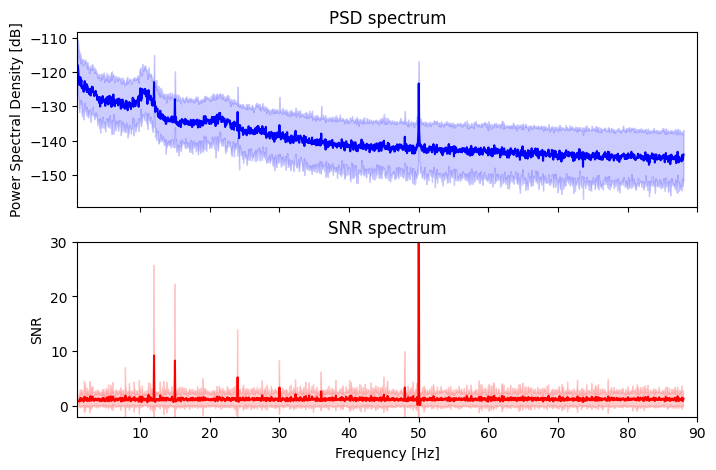

In [ ]:
fig, axes = plt.subplots(2, 1, sharex="all", sharey="none", figsize=(8, 5))

# 1Hz부터 fmax-1Hz까지의 주파수 범위 선택
# freqs는 PSD 계산 시 생성된 주파수 벡터
freq_range = range(
    np.where(np.floor(freqs) == 1.0)[0][0], np.where(np.ceil(freqs) == fmax - 1)[0][0]
)

# [1] PSD 스펙트럼
# PSD를 데시벨(dB) 단위로 변환 -> 로그 스케일 플롯을 위해
psds_plot = 10 * np.log10(psds)

# 전체 에포크와 채널에 대해 주파수별 평균과 표준편차 계산
psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
psds_std = psds_plot.std(axis=(0, 1))[freq_range]

# PSD 평균 곡선을 파란색으로 그림
# 표준편차 범위를 흐리게 음영 처리(alpha=0.2)
axes[0].plot(freqs[freq_range], psds_mean, color="b")
axes[0].fill_between(
    freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std, color="b", alpha=0.2
)
axes[0].set(title="PSD spectrum", ylabel="Power Spectral Density [dB]")

# [2] SNR 스펙트럼
# SNR spectrum
# SNR도 PSD처럼 모든 trial과 채널에 대해 주파수별 평균과 표준편차 계산
snr_mean = snrs.mean(axis=(0, 1))[freq_range]
snr_std = snrs.std(axis=(0, 1))[freq_range]

# 빨간색 선으로 SNR 평균값을 그림
# 표준편차 음영 처리
axes[1].plot(freqs[freq_range], snr_mean, color="r")
axes[1].fill_between(
    freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std, color="r", alpha=0.2
)
axes[1].set(
    title="SNR spectrum",
    xlabel="Frequency [Hz]",
    ylabel="SNR",
    ylim=[-2, 30],
    xlim=[fmin, fmax],
)
fig.show()

[그래프 분석]: EEG 데이터의 주파수 영역 분석 결과 시각화
1. PSD spectrum (상단 그래프, 파란색)
- Y축: Power Spectral Density (dB) → 로그 스케일
- X축: 주파수 (1 Hz ~ 90 Hz)
- 진한 파란선: 모든 trial과 channel에 대한 평균 전력
- 연한 음영(± 표준편차): 전력 값의 변동 범위
- 해석
    - 1~20Hz 구간에서 전체적으로 전력이 높고 이후 점차 감소
        - 1/f 감소 경향(EEG의 일반적인 특성)
    - 12Hz 근처와 15Hz 근처, 그리고 50Hz 근처에서 뚜렷한 피크가 있음
    - 12Hz, 15Hz: 실험 자극 주파수 (SSVEP 자극)
    - 50Hz: 전력선 잡음 (유럽 계열 국가에서는 50Hz, 한국/미국은 60Hz)
- 자극 주파수에서의 유의미한 반응이 PSD 상에서도 드러남.

2. SNR spectrum (하단 그래프, 빨간색)
- Y축: Signal-to-Noise Ratio (SNR)
- X축: 주파수 (1 ~ 90 Hz)
- 진한 빨간선: 평균 SNR
- 연한 빨간 음영: 표준편차
- 해석:
    - 12Hz, 15Hz, 50Hz에서 뚜렷한 SNR 피크가 관측됨.
    - 특히 50Hz에서 매우 높은 SNR → 전력선 노이즈가 명확히 존재함
    - 12Hz, 15Hz도 잡음 대비 확실히 두드러지는 반응 → SSVEP 자극에 대한 뇌 반응이 성공적으로 포착됨

[종합 해석 요약]
- 12Hz, 15Hz: 자극 주파수에 대응하는 뇌 반응 존재, SNR로 볼 때 반응이 명확함
- 50Hz 피크: 전력선 잡음의 존재. 실험 환경에서 흔히 발생
- 1/f 경향: PSD가 고주파로 갈수록 감소하는 전형적인 EEG 특성
- SNR 스펙트럼의 장점: PSD로는 파악이 어려운 뚜렷한 자극 반응을 배경 잡음을 제거한 상대적 세기로 강조함


You can see that the peaks at the stimulation frequencies (12 Hz, 15 Hz)
and their harmonics are visible in both plots (just as the line noise at
50 Hz).
Yet, the SNR spectrum shows them more prominently as peaks from a
noisy but more or less constant baseline of SNR = 1.
You can further see that the SNR processing removes any broad-band power
differences (such as the increased power in alpha band around 10 Hz),
and also removes the 1/f decay in the PSD.

Note, that while the SNR plot implies the possibility of values below 0
(mean minus sd) such values do not make sense.
Each SNR value is a ratio of positive PSD values, and the lowest possible PSD
value is 0 (negative Y-axis values in the upper panel only result from
plotting PSD on a log scale).
Hence SNR values must be positive and can minimally go towards 0.

- 자극 주파수인 12 Hz, 15 Hz, 그리고 그 고조파(harmonics) 에 해당하는 피크들이 두 그래프 모두에서 확인될 수 있다 (또한 50 Hz 전력선 잡음도 마찬가지로 나타난다).
- 하지만 SNR 스펙트럼에서는 이 피크들이 더 뚜렷하게 강조되어 보인다, 왜냐하면 전체적으로 SNR = 1 수준의 거의 일정한 잡음 기반(baseline) 위에서 피크가 튀어나오기 때문이다.
- 또한, SNR 처리 과정을 통해 다음과 같은 효과가 있음을 알 수 있다:
    - 10 Hz 근처의 알파 대역 전력 증가와 같은 넓은 주파수 대역(broad-band)의 전력 차이는 제거된다.
    - 또한 PSD에서 보이는 1/f 감소 경향도 제거된다.
- 참고로, SNR 그래프에서 표준편차를 포함해 음수로 보일 수 있는 부분은 논리적으로 의미가 없다.
    - SNR은 PSD 값의 비율로 계산되므로 항상 양수이다.
    - PSD 값 자체도 0 이상이며, 상단(PSD) 그래프에서 음수로 보이는 이유는 로그 스케일을 사용했기 때문이다.
    - 따라서 SNR은 이론적으로 0보다 클 수밖에 없으며, 가장 낮은 값은 0에 가까운 값이 된다.

[요약]
- SNR 스펙트럼은 PSD보다 자극 반응을 더 분명하게 시각화해준다.
- SNR은 배경 잡음의 영향을 제거하고, 주파수별 상대적인 반응 강도를 잘 드러내며,
- PSD의 넓은 대역 전력 차이나 1/f 감소 패턴을 효과적으로 제거해준다.

## Extract SNR values at the stimulation frequency

Our processing yielded a large array of many SNR values for each trial ×
channel × frequency-bin of the PSD array.

For statistical analysis we obviously need to define specific subsets of this
array. First of all, we are only interested in SNR at the stimulation
frequency, but we also want to restrict the analysis to a spatial ROI.
Lastly, answering your interesting research questions will probably rely on
comparing SNR in different trials.

Therefore we will have to find the indices of trials, channels, etc.
Alternatively, one could subselect the trials already at the epoching step,
using MNE's event information, and process different epoch structures
separately.

Let's only have a look at the trials with 12 Hz stimulation, for now.

## 자극 주파수에서의 SNR 값 추출
- 지금까지의 처리 결과는 각 trial x 채널 x 주파수 bin에 대해 매우 많은 SNR 값들을 포함한 배열을 생성했다.
- 하지만 통계 분석(statisitcal analysis)을 위해서는 이 전체 배열에서 특정 부분만 선택(subset)해야 한다.
- 구체적으로 다음과 같은 이유가 있다:
    - 우리는 자극 주파수에서의 SNR 값만 필요하다.
    - 또한 분석을 특정 뇌 영역(spatial ROI)에 국한시키고 싶다.(예: 후두부 채널만 분석 등)
    - 마지막으로, 실제 연구 질문에 답하기 위해서는 서로 다른 trial 간의 SNR 값을 비교해야할 것이다
- 이러한 이유로 우리는:
    - 어떤 trial이 12Hz 자극인지
    - 어떤 채널을 사용할 것인지
    - 자극 주파수의 주파수 bin이 몇 번째인지
    - -> 이러한 인덱스(index)들을 찾아야 한다.
- 물론, 이러한 작업은 epoch 단계에서 MNE의 event 정보를 활용해 처음부터 trial을 분리(epoching)해서 처리하는 방법도 가능하다.

In [ ]:
# 우선, 12Hz 자극이 포함된 trial들에 대해서만 살펴보자.
# define stimulation frequency
stim_freq = 12.0

### Get index for the stimulation frequency (12 Hz)
Ideally, there would be a bin with the stimulation frequency exactly in its
center. However, depending on your Spectral decomposition this is not
always the case. We will find the bin closest to it - this one should contain
our frequency tagged response.

### 자극 주파수(12Hz)에 해당하는 bin의 인덱스 찾기
- 이상적으로는, 자극 주파수(12Hz)가 정확히 중심에 위치한 주파수bin이 존재하면 좋다.
- 하지만 실제로는, 스펙트럼 분해 방식(Spectral decomposition)에 따라 그런 bin이 항상 존재하는 것이 아니다.
- 따라서 우리는 자극 주파수와 가장 가까운 주파수 bin을 찾아야 한다.
- 이 bin이 바로 우리가 원하는 주파수 태깅(frequency-tagged) 반응이 담긴 bin일 것이다.

#### 자극 주파수 및 그 고조파(harmonics)에 가장 가까운 주파수 bin의 인덱스(index)를 찾는 작업
- FFR/PSD 결과에서 주파수는 freqs라는 배열에 저장돼 있고, 우리는 그 배열에서 원하는 주파수에 가장 가까운 값을 찾아야 한다.
- 왜 이렇게 하냐?
    - FFT나 PSD 결과는 항상 주파수가 딱 정수 단위로 나뉘어 있지 않을 수도 있기 때문이다.
    - 예를 들어 12Hz를 찾고 싶지만 freqs에 정확히 12.0이 없고 11.95, 12.15만 있을 수도 있어서,
    - 가장 가까운 값의 인덱스를 찾는 방식을 쓴다.
- 이 인덱스들은 어디에 쓰니야?
    - snrs[:, :, i_bin_12hz] 이렇게 쓰면,
    - 모든 trial, 모든 채널에서의 12Hz 주파수 bin에서의 SNR 값만 추출할 수 있어.
    - 마찬가지로 15Hz, 30Hz, 36Hz 등에서도 동일한 방식으로 뇌의 반응 강도를 비교할 수 있음.

In [ ]:
# stim_freq가 12로 설정되어 있다면:
#   freqs는 예: [1.0, 1.5, ..., 89.5, 90.0] 같은 주파수 리스트야.
#   abs(freqs - 12)는 각 주파수가 12Hz에서 얼마나 떨어져 있는지를 나타냄.
#   np.argmin(...)은 그 중 가장 가까운 값의 인덱스를 반환함.
# 즉, 12Hz에 가장 가까운 주파수 bin의 인덱스를 i_bin_12hz에 저장함.

# find index of frequency bin closest to stimulation frequency
i_bin_12hz = np.argmin(abs(freqs - stim_freq))
# could be updated to support multiple frequencies

# for later, we will already find the 15 Hz bin and the 1st and 2nd harmonic
# for both.
i_bin_24hz = np.argmin(abs(freqs - 24)) # 12Hz의 2배 (2nd harmonic)
i_bin_36hz = np.argmin(abs(freqs - 36)) # 12Hz의 3배 (3rd harmonic)
i_bin_15hz = np.argmin(abs(freqs - 15)) # 15Hz 자극 주파수
i_bin_30hz = np.argmin(abs(freqs - 30)) # 15Hz의 2배 (2nd harmonic)
i_bin_45hz = np.argmin(abs(freqs - 45)) # 15Hz의 3배 (3rd harmonic)

### Get indices for the different trial types (다양한 시험 유형에 대한 인덱스 가져오기)
- EEG 데이터에서 특정 자극 주파수 (12Hz, 15Hz)에 해당하는 trial의 인덱스 추출
- epochs로 잘라낸 데이터 중에서 어떤 trial이 12Hz 자극이고, 어떤 trial이 15Hz 자극인지 구분하기 위한 필수 작업

In [ ]:
# epochs.annotations.description:
#   각 trial에 붙어 있는 주석(Annotation) 의 설명 부분.
#   예를 들어 "12hz", "15hz"와 같은 문자열이 들어 있음.
# == "12hz":
#   주석 설명이 "12hz"인 trial만 선택
# np.where(...)[0]:
#   조건을 만족하는 인덱스들을 1차원 배열로 반환
# → 결과적으로 i_trial_12hz는 "12hz" 자극이 주어진 trial의 인덱스들로 구성됨.

i_trial_12hz = np.where(epochs.annotations.description == "12hz")[0]
i_trial_15hz = np.where(epochs.annotations.description == "15hz")[0]

### Get indices of EEG channels forming the ROI (ROI를 형성하는 뇌파 채널의 지표를 가져온다.)
- 후두부(visual)영역에 해당하는 EEG 채널만 선택하기 위한 설정
- EEG 분석에서는 뇌의 특정 영역(ROI, Region of Interest)을 기준으로 분석하는 것이 일반적인데,
- 지금은 시각 자극(12Hz, 15Hz, 체커보드)에 댕ㅇ하는 시각 피질 후두부(visual cortex)에 주목

In [ ]:
# Define different ROIs
roi_vis = [
    "POz",
    "Oz",
    "O1",
    "O2",
    "PO3",
    "PO4",
    "PO7",
    "PO8",
    "PO9",
    "PO10",
    "O9",
    "O10",
]  # visual roi

# epochs.info: EEG 채널 정보가 들어있는 MNE 객체
# eeg=True: EEG 채널만 선택
# stim=False: 자극 채널(stim channel)은 제외
# exclude="bads": raw.info['bads']에 등록된 고장 채널은 제외
# selection=roi_vis: 앞에서 정의한 채널 이름만 선택
# → 결과: picks_roi_vis는 roi_vis에 해당하는 채널들의 숫자 인덱스 목록
# 예를 들어, picks_roi_vis = [30, 31, 32, ...] 이런 식이 됨
# Find corresponding indices using mne.pick_types()
picks_roi_vis = mne.pick_types(
    epochs.info, eeg=True, stim=False, exclude="bads", selection=roi_vis
)

### Apply the subset, and check the result
Now we simply need to apply our selection and yield a result. Therefore,
we typically report grand average SNR over the subselection.

In this tutorial we don't verify the presence of a neural response.
This is commonly done in the ASSR literature where SNR is
often lower. An F-test or Hotelling T² would be
appropriate for this purpose.

### 선택한 부분에 적용하고 결과 확인하기
- 이제 우리가 앞에서 정의한 조건(ROI, 주파수, trial 조건)을 적용하고 결과를 도출하면 된다.
- 보통 이 단계에서는, 선택된 부분의 SNR 값들에 대해 평균을 계산해서 grand average SNR(전체 평균 SNR)을 보고하게 된다.
- 이 튜토리얼에서는 신경 반응(neural response)의 존재 여부를 검증하지는 않는다.
    - (예: 자극에 실제로 반응이 있었는지를 확인하는 절차는 생략)
- 이러한 검증은 보통 ASSR(청각 지속 유발 반응) 연구에서 수행되며, 그 경우에는 SNR 값이 더 낮게 나오는 편이라서, 반응 존재 여부의 통계적 확인이 중요하다.
- 그럴 때는 다음과 같은 통계 검정을 사용하는 것이 적절하다:
    - F-검정 (F-test)
    - Hotelling의 T² 검정 (Hotelling’s T-squared test)
- 즉, 지금은 단순히 자극 조건(예: 12Hz 자극)과 ROI에 대해 SNR 평균값을 확인하는 수준이며, 정식 통계 검정까지는 수행하지 않는다는 의미다.

#### 12Hz trial, 12Hz 주파수 bin, 시각 ROI 채널을 적용해서, 해당 조건에 해당하는 뇌의 반응 강도(SNR)를 실제로 추출하고, 그 평균값을 계산하는 단계

In [ ]:
# 1. snrs[i_trial_12hz, :, i_bin_12hz]
#   전체 snrs 배열은 (n_trials, n_channels, n_freqs) 구조야.
#   여기서:
#       i_trial_12hz: 12Hz 자극이 주어진 trial들만 선택
#       :: 모든 채널
        # i_bin_12hz: 12Hz에 해당하는 주파수 bin만 선택
# → 결과는 shape (n_12hz_trials, n_channels)의 배열이 됨 → 즉, trial마다 채널별 SNR 값

# 2. [:, picks_roi_vis]
# 위 결과에서 시각 피질(Occipital ROI) 에 해당하는 채널들만 선택
# 즉, shape은 (n_12hz_trials, n_roi_channels)이 됨
# → 이 배열이 바로 snrs_target: 12Hz 자극을 받은 trial들의 시각 영역 채널에서의 12Hz SNR 값들
snrs_target = snrs[i_trial_12hz, :, i_bin_12hz][:, picks_roi_vis]

# 현재 보고 있는 데이터는 2번 파험자(sub 2)의 12Hz 자극에 대한 trial들에서 12Hz 자극 주파수에서의 SNR 값이라는 설명 출력
print("sub 2, 12 Hz trials, SNR at 12 Hz")

# 선택된 ROI 채널들과 trial 전체에서의 SNR 평균값을 계산하여 출력
# 이 평균값이 클수록 자극 주파수에 대한 뇌 반응이 강하게 나타났다는 증거
print(f"average SNR (occipital ROI): {snrs_target.mean()}")

sub 2, 12 Hz trials, SNR at 12 Hz
average SNR (occipital ROI): 41.6936554171862


## Topography of the vSSR
But wait...
As described in the intro, we have decided *a priori* to work with average
SNR over a subset of occipital channels - a visual region of interest (ROI)
- because we expect SNR to be higher on these channels than in other
channels.

Let's check out, whether this was a good decision!

Here we will plot average SNR for each channel location as a topoplot.
Then we will do a simple paired T-test to check, whether average SNRs over
the two sets of channels are significantly different.

## vSSR(시각 지속 유발 반응)의 두피 분포(Topography)
- 잠깐만... 인트로에서 언급했던 것처럼, 우리는 분석을 시작하기 전(a priori) 에 후두부(Occipital) 영역의 일부 채널들을 평균내어 SNR을 분석하기로 결정했다.
- 이는 이 영역에서 다른 채널보다 SNR이 더 높을 것이라고 예상했기 때문이다.

- 그런데, 정말로 우리의 선택이 옳았는지 확인해보자!
- 이번 단계에서는 다음을 수행할 것이다:
    - 1. 각 채널 위치별 SNR 평균값을 두피 지도(topomap) 형태로 시각화
        - → 시각적으로 어떤 채널에 반응이 강하게 나타나는지 확인
    - 2. 그리고 간단한 대응표본 T-검정(paired T-test) 을 통해 ROI 채널 집합 vs 나머지 채널 집합 간의 평균 SNR이 통계적으로 유의하게 다른지를 검정할 것이다.

- 즉, "우리가 ROI로 선택한 시각 영역이 실제로 더 높은 반응을 보이는가?"
라는 가정을 시각적/통계적으로 확인하는 과정

#### 12Hz 자극에 대한 SNR을 두피 전체 채널 vs 시각 영역(ROI) 채널로 나누어 비교 분석하는 단계
1. 두피 전체 채널의 SNR 평균값(topomap 시각화)
2. 전체 채널 평균 SNR vs 후두부 ROI 평균 SNR 비교
3. 통계 검정 (paired t-test) 을 통해 두 영역 간 SNR 차이가 유의한지 확인

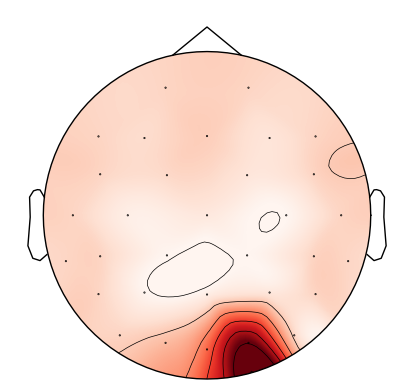

sub 2, 12 Hz trials, SNR at 12 Hz
average SNR (all channels): 16.98590219033801
average SNR (occipital ROI): 41.6936554171862
12 Hz SNR in occipital ROI is significantly larger than 12 Hz SNR over all channels: t = 6.950, p = 6.681036517815684e-05


In [ ]:
# get average SNR at 12 Hz for ALL channels

# 1. 전체 채널에서의 SNR 추출 및 평균
# snrs에서:
#   i_trial_12hz: 12Hz 자극 trial만 선택
#   :: 모든 채널
#   i_bin_12hz: 12Hz 주파수 bin만 선택
# 결과: (n_trials, n_channels) 형태의 SNR 배열
snrs_12hz = snrs[i_trial_12hz, :, i_bin_12hz]

# trial 방향으로 평균 → 각 채널별 평균 SNR (shape: [n_channels])
snrs_12hz_chaverage = snrs_12hz.mean(axis=0)


# plot SNR topography

# 2. 두피 SNR 분포 시각화
# plot_topomap: 각 채널의 값을 두피 지도 위에 시각화 (Topographic Map)
# vlim=(1, None): SNR 최소값은 1로 고정, 최대값은 자동 설정
# 이 그림을 통해 어느 부위 채널이 가장 강한 반응을 보이는지 확인 가능
#   → 후두부에서 높다면, ROI 설정이 잘 된 것!
fig, ax = plt.subplots(1)
mne.viz.plot_topomap(snrs_12hz_chaverage, epochs.info, vlim=(1, None), axes=ax)


# 3. 결과 출력: 평균값 비교
print("sub 2, 12 Hz trials, SNR at 12 Hz")
print(f"average SNR (all channels): {snrs_12hz_chaverage.mean()}")
print(f"average SNR (occipital ROI): {snrs_target.mean()}")


# 4. 통계 검정: ROI vs 두피 전체 비교
# 대응표본 t-검정 (paired t-test) 수행
# 조건:
#   각 trial에 대해
#       snrs_target.mean(axis=1): ROI 채널들의 평균 SNR
#       snrs_12hz.mean(axis=1): 전체 채널의 평균 SNR
# 즉, 같은 trial 안에서 "ROI SNR > 전체 SNR" 인지 비교함
tstat_roi_vs_scalp = ttest_rel(snrs_target.mean(axis=1), snrs_12hz.mean(axis=1))

# 검정 결과의 t값과 p값 출력
# p값이 작을수록(예: 0.05 이하) 통계적으로 유의미한 차이라는 뜻
print(
    "12 Hz SNR in occipital ROI is significantly larger than 12 Hz SNR over all "
    f"channels: t = {tstat_roi_vs_scalp[0]:.3f}, p = {tstat_roi_vs_scalp[1]}"
)

We can see, that 1) this participant indeed exhibits a cluster of channels
with high SNR in the occipital region and 2) that the average SNR over all
channels is smaller than the average of the visual ROI computed above.
The difference is statistically significant. Great!

Such a topography plot can be a nice tool to explore and play with your data
- e.g. you could try how changing the reference will affect the spatial
distribution of SNR values.

However, we also wanted to show this plot to point at a potential
problem with frequency-tagged (or any other brain imaging) data:
there are many channels and somewhere you will likely find some
statistically significant effect.
It is very easy - even unintended - to end up double-dipping or p-hacking.
So if you want to work with an ROI or individual channels, ideally select
them *a priori* - before collecting or looking at the data - and preregister
this decision so people will believe you.
If you end up selecting an ROI or individual channel for reporting *because
this channel or ROI shows an effect*, e.g. in an explorative analysis, this
is also fine but make it transparently and correct for multiple comparison.

- 우리는 다음 두 가지 사실을 확인할 수 있다:
    - 이 참가자는 실제 후두부(Occipital) 영역에서 높은 SNR 값을 보이는 채널들의 군집(cluster)을 나타내며,
    - 전체 채널 평균 SNR보다 시각 ROI(Visual ROI) 평균 SNR이 더 크다는 것이다.
        - 이 차이는 통계적으로 유의미하다.
- 이러한 topography plot(두피 분포도) 은 데이터를 탐색하거나 실험적으로 다뤄볼 수 있는
좋은 시각화 도구가 될 수 있다.
- 예를 들어, 기준 전극(reference) 을 변경했을 때 SNR의 공간 분포가 어떻게 달라지는지 실험해볼 수도 있다.
- 하지만 이 플롯을 보여주는 또 다른 이유는, 주파수 태깅(frequency-tagged) 데이터뿐 아니라 모든 뇌 영상 데이터(brain imaging data) 에서 발생할 수 있는 잠재적 문제를 강조하기 위해서다:
    - EEG에는 많은 수의 채널이 있고,
    - 어디에선가는 통계적으로 유의한 효과가 우연히라도 나올 수 있다.
- 즉, double-dipping(데이터를 두 번 써서 검증하는 오류)이나 p-hacking(유의한 결과를 억지로 찾으려는 행위)이 의도하지 않아도 쉽게 발생할 수 있다.
- 그러므로 만약 ROI(관심 영역) 나 개별 채널을 기준으로 분석하고 싶다면, 이상적으로는:
    - 데이터를 수집하거나 보기 전에(a priori)
    - 사용할 ROI나 채널을 선정하고,
    - 그 결정을 사전 등록(preregister) 해두는 것이 바람직하다.
        - → 그래야 타인이 결과를 믿고 재현 가능하다고 판단할 수 있다.
- 만약 당신이 ROI나 채널을 데이터를 본 이후에, 즉 "이 채널에서 효과가 나타났기 때문에" 선택한 것이라면 (탐색적 분석, exploratory analysis),
    - 그것도 괜찮지만, 그 사실을 투명하게 공개하고
    - 다중 비교(multiple comparisons) 에 대한 보정을 반드시 적용해야 한다.

- “뇌 데이터는 탐색적으로 보면 뭔가 유의미한 결과가 나올 수밖에 없기 때문에, 사전에 명확한 분석 계획을 세우거나, 그렇지 않다면 통계적 보정을 철저히 해야 한다.”

## Statistical separation of 12 Hz and 15 Hz vSSR
After this little detour into open science, let's move on and
do the analyses we actually wanted to do:

We will show that we can easily detect and discriminate the brains responses
in the trials with different stimulation frequencies.

In the frequency and SNR spectrum plot above, we had all trials mixed up.
Now we will extract 12 and 15 Hz SNR in both types of trials individually,
and compare the values with a simple t-test.
We will also extract SNR of the 1st and 2nd harmonic for both stimulation
frequencies. These are often reported as well and can show interesting
interactions.

## 12Hz와 15Hz 시각 지속 유발 반응(vSSR)의 통계적 분리
- 서로 다른 자극 주파수(12Hz vs 15Hz)를 사용할 경우, 뇌의 반응이 명확하게 구분(discriminate)된다는 것
- 앞서 보았던 주파수 및 SNR 스펙트럼 그래프에서는 모든 trial이 섞여 있었기 때문에, 자극 조건에 따른 차이가 명확하지 않았다.
- 이번에는 
    - 각각의 자극 조건(trial)에 대해
        - 12Hz 자극 trial에서의 12Hz SNR
        - 15Hz 자극 trial에서의 15Hz SNR을
        - 개별적으로 추출
    - 두 조건 간의 차이를 간단한 t-검정(t-test)을 통해 비교
- 또한:
    - 각 자극 주파수의 1차 고조파(2배 주파수)와 
    - 2차 고조파(3배 주파수)에 해당하는 SNR도 함께 추출하여 분석

#### 12Hz vs 15Hz 자극에 대한 뇌 반응을 주파수별로 시각화하고, 두 자극 조건이 실제로 구분되는지 확인
- 자극 주파수(12, 15 Hz) 와 그 고조파(24, 30, 36, 45 Hz) 에서의 SNR을 추출
- 자극 조건별(12Hz 자극 vs 15Hz 자극) 평균 SNR을 막대그래프(bar plot) 로 비교
- 시각적 비교 + 이후 통계 검정을 위한 값들(res) 저장

C:\Users\kyungho\AppData\Local\Temp\ipykernel_25772\3642232202.py:39: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


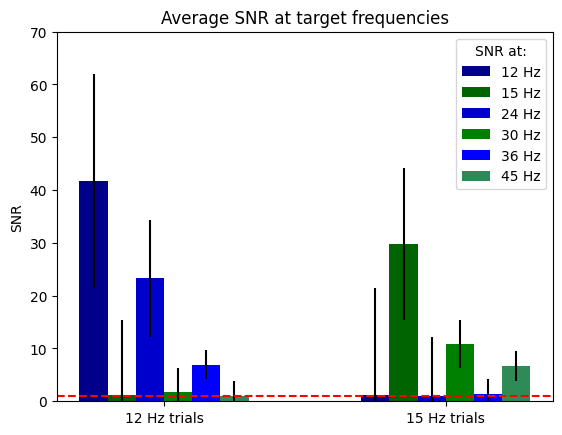

In [ ]:
# 1. ROI 영역의 SNR만 추출
# 전체 SNR 데이터에서 시각 ROI 채널만 선택
# mean(axis=1) -> 채널 축을 평균 -> shape: (n_trials, n_freqs) -> 각 trial마다 주파수별 평균 SNR
snrs_roi = snrs[:, picks_roi_vis, :].mean(axis=1)

# 2. 시각화 설정용 변수들
# 서로 다른 주파수를 막대그래프 하나의 x축 위치에서 조금씩 나눠 그리기 위한 위치 보정값
freq_plot = [12, 15, 24, 30, 36, 45]    # 분석할 주파수 리스트
color_plot = ["darkblue", "darkgreen", "mediumblue", "green", "blue", "seagreen"]   # 막대 색상
xpos_plot = [-5.0 / 12, -3.0 / 12, -1.0 / 12, 1.0 / 12, 3.0 / 12, 5.0 / 12] # x축 상에서 막대 위치 보정값

fig, ax = plt.subplots()

# labels: x축 레이블 → 자극 조건별 trial
# res: 이후 t-test를 위한 결과 저장용 딕셔너리
labels = ["12 Hz trials", "15 Hz trials"]
x = np.arange(len(labels))  # the label locations
width = 0.6  # the width of the bars
res = dict()

# 3. 반복문: 주파수별 막대 그래프 그리기
# loop to plot SNRs at stimulation frequencies and harmonics
# np.argmin(abs(freqs - f)): f에 가장 가까운 주파수 bin 인덱스 찾기
# 해당 주파수에서 12Hz 자극 trial, 15Hz 자극 trial의 SNR 값을 각각 추출
for i, f in enumerate(freq_plot):
    # extract snrs
    stim_12hz_tmp = snrs_roi[i_trial_12hz, np.argmin(abs(freqs - f))]
    stim_15hz_tmp = snrs_roi[i_trial_15hz, np.argmin(abs(freqs - f))]
    SNR_tmp = [stim_12hz_tmp.mean(), stim_15hz_tmp.mean()]  # 각 조건별 SNR 평균값 → 막대그래프 높이
    
    # 막대 그래프 시각화
    # plot (with std)
    ax.bar(
        x + width * xpos_plot[i],   # 살짝 옆으로 밀어 겹치지 않게
        SNR_tmp,
        width / len(freq_plot), # 막대 너비 분할
        yerr=np.std(SNR_tmp),   # 에러바: 표준편차
        label=f"{f} Hz SNR",
        color=color_plot[i],
    )

    # 나중에 통계 검정을 위해 각 주파수별 SNR 데이터를 res 딕셔너리에 저장
    # store results for statistical comparison
    res[f"stim_12hz_snrs_{f}hz"] = stim_12hz_tmp
    res[f"stim_15hz_snrs_{f}hz"] = stim_15hz_tmp

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("SNR")
ax.set_title("Average SNR at target frequencies")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend([f"{f} Hz" for f in freq_plot], title="SNR at:")
ax.set_ylim([0, 70])
ax.axhline(1, ls="--", c="r")
fig.show()

[그래프 분석]: 12Hz 자극 vs 15Hz 자극 trial에서의 자극 주파수 및 고조파(1차, 2차) 주파수에서의 SNR을 비교 시각화한 결과
- X축:
    - 12 Hz trials: 12Hz 자극이 주어진 trial 그룹
    - 15 Hz trials: 15Hz 자극이 주어진 trial 그룹
- Y축:
    - 해당 주파수에서의 SNR (Signal-to-Noise Ratio) 평균값
- 색상 및 범례:
    - 각 색은 분석 주파수 (12, 15, 24, 30, 36, 45Hz) 를 의미
    - 각각은 자극 주파수 및 1차(×2), 2차(×3) 고조파에 해당함
- 에러바:
    - 표준편차 (SNR 값의 trial 간 분산)
- 빨간 점선 (y=1):
    - baseline 수준의 SNR (→ 1 이상이면 의미 있는 반응 가능성)
- 12 Hz trials
    - 12 Hz: SNR이 약 40 이상으로 가장 강한 반응
        - → 12Hz 자극이 뇌에 명확히 반영됨
    - 24 Hz (1st harmonic): 약 25 이상으로 두 번째로 강한 반응
    - 36 Hz (2nd harmonic): 약 10 이하로도 여전히 의미 있는 반응
    - 나머지 (15, 30, 45Hz): baseline 수준 (1~2), 반응 없음
    - 12Hz 자극 → 12Hz + 고조파에서 SNR 피크 발생
- 15 Hz trials
    - 15 Hz: SNR이 약 30 정도, 가장 강함
    - 30 Hz (1st harmonic): 약 12 정도로 고조파 반응 존재
    - 45 Hz (2nd harmonic): 약 7~8로 여전히 유효
    - 나머지 (12, 24, 36Hz): baseline 수준
    - 15Hz 자극 → 15Hz + 고조파에서 SNR 피크 발생

As you can easily see there are striking differences between the trials.
Let's verify this using a series of two-tailed paired T-Tests.
- 쉽게 볼 수 있듯이, 각 시도 간에는 눈에 띄는 차이가 있다.
- 일련의 양측 대응 t-test를 사용하여 이를 검증해보자.


#### 자극 주파수와 그 고조파(1차, 2차)에 대해 trial 내에서의 SNR 차이를 통계적으로 비교
- 각 자극 조건(12Hz 자극, 15Hz 자극)에서 서로 다른 주파수들 간 SNR이 유의미하게 다른지를 대응표본 t-검정 (ttest_rel) 으로 확인
- 분석 대상:
    - 조건 1: 12Hz 자극을 받은 trial
    - 조건 2: 15Hz 자극을 받은 trial
- 기본 자극 주파수: 12Hz vs 15Hz
- 1차 고조파: 24Hz vs 30Hz
- 2차 고조파: 36Hz vs 45Hz

In [ ]:
# Compare 12 Hz and 15 Hz SNR in trials after averaging over channels

# [12Hz 자극 trial 내부 비교]
# 같은 12Hz trial에서 12Hz vs 15Hz SNR 비교
#   -> 자극 주파수(12Hz)에서 더 강한 반응이어야 정상이므로 이 차이가 유의미한지 확인
tstat_12hz_trial_stim = ttest_rel(
    res["stim_12hz_snrs_12hz"], res["stim_12hz_snrs_15hz"]
)
print(
    "12 Hz Trials: 12 Hz SNR is significantly higher than 15 Hz SNR: t = "
    f"{tstat_12hz_trial_stim[0]:.3f}, p = {tstat_12hz_trial_stim[1]}"
)

# 고조파 비교: 24Hz(12Hz의 1차) vs 30Hz(15Hz의 1차)
tstat_12hz_trial_1st_harmonic = ttest_rel(
    res["stim_12hz_snrs_24hz"], res["stim_12hz_snrs_30hz"]
)
print(
    "12 Hz Trials: 24 Hz SNR is significantly higher than 30 Hz SNR: t = "
    f"{tstat_12hz_trial_1st_harmonic[0]:.3f}, p = {tstat_12hz_trial_1st_harmonic[1]}"
)

# 고조파 비교: 36Hz(12Hz의 2차) vs 45Hz(15Hz의 2차)
tstat_12hz_trial_2nd_harmonic = ttest_rel(
    res["stim_12hz_snrs_36hz"], res["stim_12hz_snrs_45hz"]
)
print(
    "12 Hz Trials: 36 Hz SNR is significantly higher than 45 Hz SNR: t = "
    f"{tstat_12hz_trial_2nd_harmonic[0]:.3f}, p = {tstat_12hz_trial_2nd_harmonic[1]}"
)


# [15Hz 자극 trial 내부 비교]
# 같은 15Hz trial에서 15Hz vs 12Hz SNR 비교
print()
tstat_15hz_trial_stim = ttest_rel(
    res["stim_15hz_snrs_12hz"], res["stim_15hz_snrs_15hz"]
)
print(
    "15 Hz trials: 12 Hz SNR is significantly lower than 15 Hz SNR: t = "
    f"{tstat_15hz_trial_stim[0]:.3f}, p = {tstat_15hz_trial_stim[1]}"
)

# 30Hz vs 24Hz (1차 고조파)
tstat_15hz_trial_1st_harmonic = ttest_rel(
    res["stim_15hz_snrs_24hz"], res["stim_15hz_snrs_30hz"]
)
print(
    "15 Hz trials: 24 Hz SNR is significantly lower than 30 Hz SNR: t = "
    f"{tstat_15hz_trial_1st_harmonic[0]:.3f}, p = {tstat_15hz_trial_1st_harmonic[1]}"
)

# 45Hz vs 36Hz (2차 고조파)
tstat_15hz_trial_2nd_harmonic = ttest_rel(
    res["stim_15hz_snrs_36hz"], res["stim_15hz_snrs_45hz"]
)
print(
    "15 Hz trials: 36 Hz SNR is significantly lower than 45 Hz SNR: t = "
    f"{tstat_15hz_trial_2nd_harmonic[0]:.3f}, p = {tstat_15hz_trial_2nd_harmonic[1]}"
)

# 출력:
# t = ...: t 통계량 → 그룹 간 차이의 크기 (절댓값 클수록 차이 큼)
# p = ...: 유의확률 → 0.05 이하이면 통계적으로 유의함

12 Hz Trials: 12 Hz SNR is significantly higher than 15 Hz SNR: t = 7.510, p = 3.6543191814520666e-05
12 Hz Trials: 24 Hz SNR is significantly higher than 30 Hz SNR: t = 8.489, p = 1.3738935966392397e-05
12 Hz Trials: 36 Hz SNR is significantly higher than 45 Hz SNR: t = 14.899, p = 1.1962135626456762e-07

15 Hz trials: 12 Hz SNR is significantly lower than 15 Hz SNR: t = -5.692, p = 0.000297367500462259
15 Hz trials: 24 Hz SNR is significantly lower than 30 Hz SNR: t = -7.916, p = 2.40862698102251e-05
15 Hz trials: 36 Hz SNR is significantly lower than 45 Hz SNR: t = -3.519, p = 0.006524965733998793


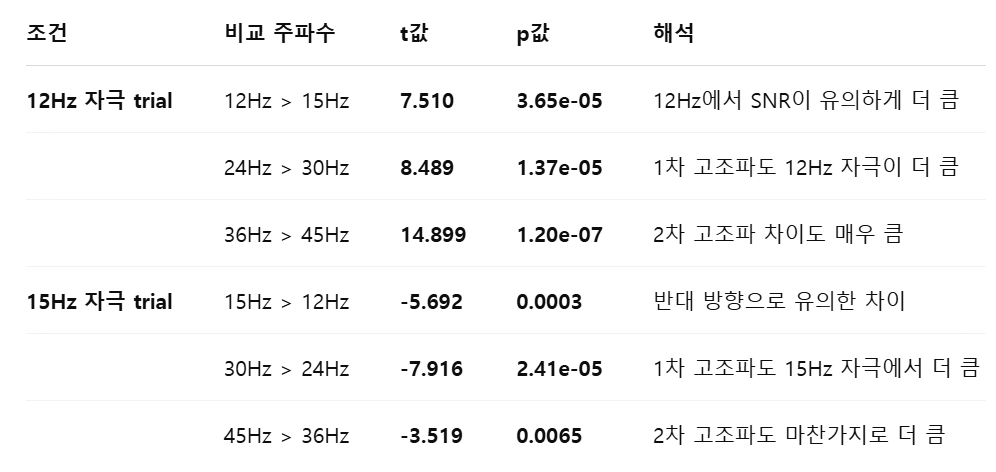

[표 분석]
- 자극 주파수에 따라 뇌의 SNR 반응이 명확히 구분된다.
- 고조파(1차, 2차)에서도 같은 방향의 반응 차이가 나타남 -> 자극 반응이 안정적이고 강력함
- 이는 SSVEP 기반의 자극 조건 분류에도 유리한 구조라는 것을 시사

## Debriefing
So that's it, we hope you enjoyed our little tour through this example
dataset.

As you could see, frequency-tagging is a very powerful tool that can yield
very high signal to noise ratios and effect sizes that enable you to detect
brain responses even within a single participant and single trials of only
a few seconds duration.

## 마무리
- 주파수 태깅(frequency-tagging) 은 매우 강력한 도구로,
- 매우 높은 신호 대 잡음비(SNR) 와 큰 효과 크기(effect size) 를 제공해준다.
- 이를 통해 단 한 명의 참가자, 심지어 몇 초짜리 단일 trial 에서도 뇌 반응을 감지할 수 있다.

## Bonus exercises
For the overly motivated amongst you, let's see what else we can show with
these data.

Using the PSD function as implemented in MNE makes it very easy to change
the amount of data that is actually used in the spectrum
estimation.

Here we employ this to show you some features of frequency
tagging data that you might or might not have already intuitively expected:

### Effect of trial duration on SNR
First we will simulate shorter trials by taking only the first x s of our 20s
trials (2, 4, 6, 8, ..., 20 s), and compute the SNR using a FFT window
that covers the entire epoch:

### 보너스 연습
- MNE에 구현된 PSD 함수 덕분에, 스펙트럼 추정에 사용할 데이터 양을 쉽게 조절할 수 있다.
- 이번에는 이 기능을 이용하여 주파수 태깅 데이터가 가진 특징들 중 일부를 살펴보자.
- 실험: Trial 길이가 SNR에 미치는 영향
    - 먼저, trial의 길이를 줄여보자.
    - 기존의 20초짜리 trial에서 앞의 일부 구간만 사용하는 방식이다.
    - 예: 2초, 4초, 6초, ..., 20초
    - 각 경우마다 해당 구간 전체를 사용하는 FFT 윈도우를 통해 SNR을 계산해본다.
    - → 이를 통해 trial 길이가 SNR에 어떤 영향을 주는지를 살펴볼 수 있다.

####  trial 길이가 SNR에 미치는 영향을 실험적으로 분석
- 즉, 짧은 trial(2초)부터 긴 trial(20초) 까지 데이터를 잘라서 그 길이에 따라 12Hz에서의 SNR이 얼마나 달라지는지를 확인하고 시각화하는 코드
- "trial이 길어질수록 SNR이 높아지는가?" → 주파수 태깅 데이터의 신호 누적 효과, 효율적인 trial 길이 등을 탐색

C:\Users\kyungho\AppData\Local\Temp\ipykernel_25772\4223249206.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


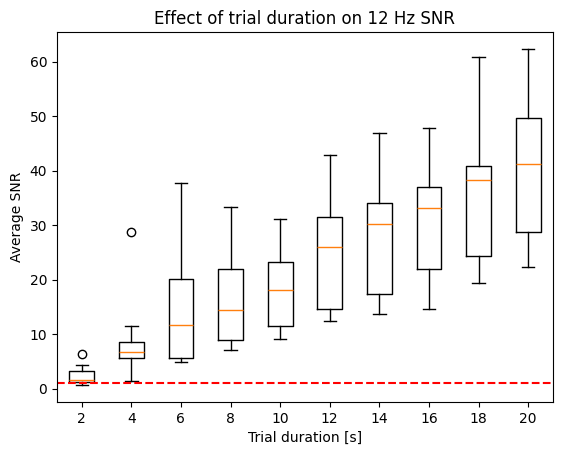

In [ ]:
stim_bandwidth = 0.5    # SNR 계산 시 고려할 주파수 대역폭 (±0.5 Hz 범위)

# shorten data and welch window
window_lengths = [i for i in range(2, 21, 2)]   # 2, 4, ..., 20초
window_snrs = [[]] * len(window_lengths)    # trial 길이별 SNR 평균값 저장 리스트

# 길이별로 trial 잘라서 SNR 계산
for i_win, win in enumerate(window_lengths):
    # compute spectrogram
    #trial의 앞부분 win초만 사용해서 PSD 계산
    #FFT 윈도우 길이도 동일하게 설정 (n_fft = sfreq * win)
    this_spectrum = epochs["12hz"].compute_psd(
        "welch",
        n_fft=int(sfreq * win),
        n_overlap=0,
        n_per_seg=None,
        tmin=0,
        tmax=win,
        window="boxcar",
        fmin=fmin,
        fmax=fmax,
        verbose=False,
    )
    windowed_psd, windowed_freqs = this_spectrum.get_data(return_freqs=True)
    # define a bandwidth of 1 Hz around stimfreq for SNR computation
    # SNR 계산 시 필요한 주변 bin 수 계산
    bin_width = windowed_freqs[1] - windowed_freqs[0]   # 주파수 bin 간격
    skip_neighbor_freqs = ( # 주파수 분해능이 너무 좋으면 자극 주파수에 인접한 bin을 건너뛰기 위한 설정
        round((stim_bandwidth / 2) / bin_width - bin_width / 2.0 - 0.5)
        if (bin_width < stim_bandwidth)
        else 0
    )
    n_neighbor_freqs = int( # 자극 주파수(12Hz) ±0.5Hz 범위 내에서 사용할 이웃 bin 개수 계산
        (
            sum((windowed_freqs <= 13) & (windowed_freqs >= 11))
            - 1
            - 2 * skip_neighbor_freqs
        )
        / 2
    )

    # SNR 계산
    # compute snr
    # 이때는 전체 trial의 ROI 채널을 사용해 SNR 계산
    # 계산된 SNR 중에서:
    #   12Hz에 가장 가까운 bin 선택
    #   ROI 채널 평균을 계산하여 저장
    windowed_snrs = snr_spectrum(
        windowed_psd,
        noise_n_neighbor_freqs=n_neighbor_freqs if (n_neighbor_freqs > 0) else 1,
        noise_skip_neighbor_freqs=skip_neighbor_freqs,
    )
    window_snrs[i_win] = windowed_snrs[
        :, picks_roi_vis, np.argmin(abs(windowed_freqs - 12.0))
    ].mean(axis=1)

# 결과 시각화
fig, ax = plt.subplots(1)
ax.boxplot(window_snrs, tick_labels=window_lengths, orientation="vertical")
ax.set(
    title="Effect of trial duration on 12 Hz SNR",
    ylabel="Average SNR",
    xlabel="Trial duration [s]",
)
ax.axhline(1, ls="--", c="r")
fig.show()

[그래프 분석]: rial 길이에 따른 12Hz SNR의 변화 시각화
- 주파수 태깅 실험에서 trial duration(자극 시간) 이 신호 검출력에 어떤 영향을 주는지 보여주는 지표
- x축: trial 길이 (초 단위, 2초부터 20초까지 2초 간격)
- y축: 평균 SNR (ROI 영역, 12Hz에서)
- 박스플롯: 각 trial 길이에서 여러 trial의 SNR 분포 (중앙값, IQR, 이상치 등)
- 빨간 점선: SNR = 1 기준선 → baseline 수준 (신호 없음 수준)

1. SNR은 trial 길이가 길어질수록 증가한다
- 2초에서는 대부분의 SNR이 baseline 수준에 머물고 있음
- 4초, 6초부터 SNR이 점점 증가하며,
- 20초 trial에서는 중앙값이 약 40에 달함 → 명확한 뇌 반응
- → 데이터 길이가 길수록 더 많은 신호를 누적, 주파수 분석 정확도 상승

2. 단기 trial에서도 일부 반응이 감지됨
- 4초 trial에서 일부 이상치(outlier)는 30 이상의 SNR을 보임 → 개별 trial이나 참가자에 따라 빠른 반응도 가능하다는 가능성

3. SNR 분산도 길이에 따라 안정화
- 짧은 trial일수록 SNR의 편차(위아래 박스 길이)가 큼
- 12초 이상부터는 SNR이 안정화되며 고르게 증가
- → 실험 설계에서 최소 8~10초 이상의 trial이 바람직


You can see that the signal estimate / our SNR measure increases with the
trial duration.

This should be easy to understand: in longer recordings there is simply
more signal (one second of additional stimulation adds, in our case, 12
cycles of signal) while the noise is (hopefully) stochastic and not locked
to the stimulation frequency.
In other words: with more data the signal term grows faster than the noise
term.

We can further see that the very short trials with FFT windows < 2-3s are not
great - here we've either hit the noise floor and/or the transient response
at the trial onset covers too much of the trial.

Again, this tutorial doesn't statistically test for the presence of a neural
response, but an F-test or Hotelling T² would be appropriate for this
purpose.

- 우리는 신호 추정값(SNR 값) 이 trial 길이에 따라 증가한다는 것을 확인할 수 있었다.
- 이것은 이해하기 쉬운 현상이다:
    - 녹음 시간이 길어질수록 단순히 더 많은 신호가 누적되기 때문이다.
    - 예를 들어, 이 경우에는 1초가 늘어날 때마다 12 사이클의 자극 신호가 추가된다.
    - 반면에 잡음(noise)은 자극 주파수에 고정되지 않고, (이상적으로는) 무작위적(stochastic) 이다.
- 즉, 데이터가 많아질수록 신호 항(signal term)은 더 빠르게 커지고, 잡음 항(noise term)은 상대적으로 느리게 증가한다는 뜻이다.
→ 그래서 SNR이 증가한다.

- 또한 우리는 FFT 윈도우가 2~3초보다 짧은 매우 짧은 trial 에서 좋은 결과가 나오지 않는다는 점도 확인할 수 있다.
- 이 경우는 잡음 바닥(noise floor)에 도달했거나,
- 또는 trial 시작 직후의 과도기 반응(transient response) 이 전체 trial의 많은 부분을 덮어버렸기 때문일 수 있다.

### Time resolved SNR
..and finally we can trick MNE's PSD implementation to make it a
sliding window analysis and come up with a time resolved SNR measure.
This will reveal whether a participant blinked or scratched their head..

Each of the ten trials is coded with a different color in the plot below.

### 시간 분해 SNR(Time-resolved SNR)
- 마지막으로, 우리는 MNE의 PSD 구현을 약간 변형(trick) 하여
- 이를 슬라이딩 윈도우 분석(sliding window analysis) 으로 바꿔,
- 시간에 따라 변화하는 SNR(Time-resolved SNR) 을 계산할 수 있다.

- 이렇게 하면, 참가자가 눈을 깜빡이거나 머리를 긁는 등의 행동을 했는지 여부를 시간 축을 따라 뇌파 신호의 변화로 포착할 수 있게 된다.

#### 시간에 따라 SNR이 어떻게 변하는지를 추적하는 time-resolved SNR 분석, 즉 슬라이딩 윈도우 기반 시계열 SNR 시각화를 수행하는 코드
- 전체 20초짜리 trial에서 4초 슬라이딩 윈도우를 이용해
- 1초 단위로 윈도우를 이동하며 각 시점의 12Hz SNR을 계산
- 각 trial의 시간별 SNR 변화를 선 그래프로 시각화

C:\Users\kyungho\AppData\Local\Temp\ipykernel_25772\939895662.py:57: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


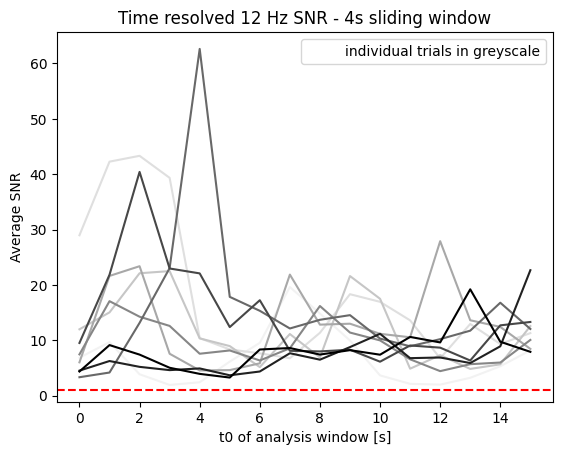

In [ ]:
# 3s sliding window
# 1. 슬라이딩 윈도우 설정
window_length = 4   # 윈도우 길이: 4초
window_starts = [i for i in range(20 - window_length)]  # 0초부터 16초까지 1초 단위 이동
window_snrs = [[]] * len(window_starts)
# → 총 17개 구간:
# [0~4초], [1~5초], ..., [16~20초]

# 2. 각 구간마다 PSD → SNR 계산
for i_win, win in enumerate(window_starts):
    # compute spectrogram
    # 현재 윈도우 구간(tmin~tmax)에 해당하는 신호만 잘라서 PSD 계산
    this_spectrum = epochs["12hz"].compute_psd(
        "welch",
        n_fft=int(sfreq * window_length) - 1,
        n_overlap=0,
        n_per_seg=None,
        window="boxcar",
        tmin=win,
        tmax=win + window_length,
        fmin=fmin,
        fmax=fmax,
        verbose=False,
    )
    windowed_psd, windowed_freqs = this_spectrum.get_data(return_freqs=True)
    # define a bandwidth of 1 Hz around stimfreq for SNR computation
    bin_width = windowed_freqs[1] - windowed_freqs[0]
    skip_neighbor_freqs = (
        round((stim_bandwidth / 2) / bin_width - bin_width / 2.0 - 0.5)
        if (bin_width < stim_bandwidth)
        else 0
    )
    n_neighbor_freqs = int(
        (
            sum((windowed_freqs <= 13) & (windowed_freqs >= 11))
            - 1
            - 2 * skip_neighbor_freqs
        )
        / 2
    )
    # compute snr
    # 그 PSD로부터 12Hz 주파수 bin 기준으로 SNR 계산
    # ROI 채널들의 평균 SNR 추출
    windowed_snrs = snr_spectrum(
        windowed_psd,
        noise_n_neighbor_freqs=n_neighbor_freqs if (n_neighbor_freqs > 0) else 1,
        noise_skip_neighbor_freqs=skip_neighbor_freqs,
    )
    window_snrs[i_win] = windowed_snrs[
        :, picks_roi_vis, np.argmin(abs(windowed_freqs - 12.0))
    ].mean(axis=1)

# 3. 시각화
fig, ax = plt.subplots(1)
colors = plt.colormaps["Greys"](np.linspace(0, 1, 10))
for i in range(10):
    ax.plot(window_starts, np.array(window_snrs)[:, i], color=colors[i])
ax.set(
    title=f"Time resolved 12 Hz SNR - {window_length}s sliding window",
    ylabel="Average SNR",
    xlabel="t0 of analysis window [s]",
)
ax.axhline(1, ls="--", c="r")
ax.legend(["individual trials in greyscale"])
fig.show()

[그래프 분석]: 4초 슬라이딩 윈도우 기반의 시간 분해 SNR 분석(time-resolved SNR) 결과 시각화
- X축: 분석 구간 시작 시간 (t0), 즉 슬라이딩 윈도우 시작 위치 (0초 ~ 15초)
- Y축: 해당 구간에서의 평균 SNR (ROI 채널 기준, 12Hz 기준)
- 선의 색: 서로 다른 10개의 trial (회색조로 표현)
- 빨간 점선 (y=1): baseline 수준 → SNR = 1은 의미 없는 수준

1. 전반적 경향
- 대부분의 trial에서 초반(0~4초) 구간에서 SNR이 급격히 높음
- 이후 SNR은 6초 이후부터 완만하게 낮아지거나 안정화
- → 초기 구간에 시작 반응(transient) 이 강하게 나타났음을 의미함

2. 개별 trial 간 차이
- 몇몇 trial에서는 t=2~4초 구간에서 SNR이 50~60까지 급등
- 이건 강한 neural response, 또는 잡음 포함 spike일 수 있음
- 반면, 어떤 trial은 전 구간에 걸쳐 SNR이 10 이하로 일정
- → 자극 반응이 약하거나 아티팩트가 개입되지 않았을 가능성

3. 이상 구간 및 안정성
- 5초 이후부터 대부분의 SNR이 10~20 사이로 유지됨
- 이는 반응이 점점 안정적으로 유지되거나, 눈 깜빡임, 움직임 등의 아티팩트가 사라진 시점일 수 있음
- 일부 trial은 후반 구간에서 다시 상승 → 개인차 또는 집중 회복 가능성

Well.. turns out this was a bit too optimistic ;)

But seriously: this was a nice idea, but we've reached the limit of
what's possible with this single-subject example dataset.
However, there might be data, applications, or research questions
where such an analysis makes sense.


